In [3]:
# loading the required modules...
import json 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import contractions 
import string
import re

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("stopwords")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
STOPSWORD_ENG = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [8]:
import tensorflow as tf

In [9]:
# setiing plot style
plt.style.use("seaborn-v0_8-darkgrid")

In [10]:
# data location
data_loc = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\clinc150\clinc150\data_small.json"

In [11]:
# data read function 
def read_data(data_loc):
    # loading the data 
    with open(data_loc) as data:
        clinc150_small = json.load(data)
    # loading training, validation and testing sets from the file..
    # training data
    train_data = pd.DataFrame(clinc150_small["train"], 
                              columns=["Query", "Intent"])
    # validation data
    val_data = pd.DataFrame(clinc150_small["val"], 
                            columns=["Query", "Intent"])
    # testing data
    test_data = pd.DataFrame(clinc150_small["test"], 
                             columns=["Query", "Intent"])

    return train_data, val_data, test_data

In [12]:
train_df, val_df, test_df = read_data(data_loc)

In [13]:
# looking at the length of training data
print("The length of the training data: ", 
      len(train_df))
# looking at the length of testing data
print("The length of the testing data: ", 
      len(test_df))
# looking at the length of validation data
print("The length of the validation data: ", 
      len(val_df))

The length of the training data:  7500
The length of the testing data:  4500
The length of the validation data:  3000


In [14]:
class_length = len(train_df.iloc[:, 1].unique())

In [15]:
domains = {}

In [ ]:
class eda():

    def __init__(self, data):
        self.data = data
        
    def null_check(self, title):
        self.data.isna().sum().plot(kind="bar",
                               title=title,
                               xlabel="Columns",
                               ylabel="No. of Null Values")
        plt.show()
    
    def query_per_class(self):
        return self.data.groupby(by="Intent").agg({"Query": "count"})
    
    def char_per_query(self, title):
        char_per_query_df = self.data["Query"].str.len()
        print("Minimum Number of Charaters in a query is: ", 
              char_per_query_df.min())
        print("Maximum Number of Charaters in a query is: ", 
              char_per_query_df.max())
        char_per_query_df.plot(kind="hist", 
                               title=f"Character per queries - {title}",
                               ylabel="Queries",
                               xlabel="No. of Charaters")
        plt.show()

    def word_per_query(self, title):
        word_per_query_df = self.data["Query"].str.split().str.len()
        print("Minimum Number of Words in a query is: ", 
              word_per_query_df.min())
        print("Maximum Number of Words in a query is: ", 
              word_per_query_df.max())
        word_per_query_df.plot(kind="hist", 
                               title=f"Words per queries - {title}",
                               ylabel="Queries",
                               xlabel="No. of Words")
        plt.show()

    def avg_word_len_per_query(self, title):
        avg_word_len_per_query = self.data["Query"].str.split().\
            apply(lambda words : [len(word) for word in words]).\
                map(lambda avg_word : np.mean(avg_word))
        print("Minimum Number of Average Words Length in a query is: ", 
              avg_word_len_per_query.min())
        print("Maximum Number of Average Words Length in a query is: ", 
              avg_word_len_per_query.max())
        avg_word_len_per_query.plot(kind="hist", 
                                    title=f"Average Word length per queries - {title}",
                                    ylabel="Queries",
                                    xlabel="Average Word Length")
        plt.show()

In [17]:
ohe = OneHotEncoder(handle_unknown="ignore")
# ohe.fit(train_df.iloc[:, 1].unique().reshape(class_length, 1))

In [18]:
class pre_process():
    def __init__(self, data):
        self.x_data = data.iloc[:, 0]
        self.y_data = data[["Intent"]]

    def preprocess(self):
        # lowing the query
        # self.x_data = tf.strings.lower(self.x_data)
        self.x_data = self.x_data.apply(lambda query: query.lower())
        # expanding the contractions 
        self.x_data = self.x_data.apply(lambda query: contractions.fix(query))
        # removing the digits and alphanumerical words
        self.x_data = self.x_data.apply(lambda query: re.sub(r"\w*\d\w*", "", query))
        # removing punctuation from
        self.x_data = self.x_data.apply(lambda query: 
                                        query.translate(str.maketrans("", 
                                                                      "", 
                                                                      string.punctuation)))
        # removing english stopwords
        self.x_data = self.x_data.apply(lambda query: 
                                      " ".join(word for word in \
                                               query.split() if word not in STOPSWORD_ENG))

        return self.x_data
    
    def lemmatise(self):
        self.x_data =  self.x_data.apply(lambda query : 
                                       " ".join(lemmatizer.lemmatize(word) \
                                                for word in query.split()))
        return self.x_data
    
    def encode_class(self):
        return ohe.fit_transform(self.y_data).toarray()
        
    # def domain_map(self, domain=domians):

In [19]:
preprocess = pre_process(train_df)

In [41]:
train_df

,Query,Intent
0,can you walk me through setting up direct depo...,direct_deposit
1,i want to switch to direct deposit,direct_deposit
2,set up direct deposit for me,direct_deposit
3,how do i go about setting up direct deposit,direct_deposit
4,i need to get my paycheck direct deposited to ...,direct_deposit
...,...,...
7495,i want my credit limit changed,credit_limit_change
7496,i would like to increase my bank of america cr...,credit_limit_change
7497,can i increase the credit limit on my old navy...,credit_limit_change
7498,can i increase the credit limit on my kohls card,credit_limit_change


In [42]:
preprocess.encode_class()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
direct = preprocess.encode_class()[0]

In [44]:
direct

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
domains = {"banking": ["transfer", "transactions", "balance", "freeze_account", "pay_bill", "bill_balance", "bill_due", "interest_rate", "routing_number", "minimum payment", "order_checks", "pin_change", "report_fraud", "account_blocked", "spending_history"], 
           "credit_cards": ["credit_score", "report_lost_card", "credit_limit", "rewards_balance", "new_card", "apllication_status", "card_declined", "international_fees", "apr", "redeem_rewards", "credit_limit_change", "damaged_card", "replacement_card_duration", "improve_credit_score", "expiration_date"], 
           "kitchen_dining": ["recipe", "restaurant_reviews", "calories", "nutrition_info", "restaurant_suggestion", "ingredient_list", "ingredient_substitution", "cook_time", "food_last", "meal_suggestion", "restaurant_reservation", "confirm_reservation", "how_busy", "cancel_reservation", "accept_reservations"],
           "home": ["shopping_list", "shopping_list_update", "next_song", "play_music", "update_playlist", "todo_list", "todo_list_update", "calendar", "calendar_update", "what_song", "order", "order_status", "reminder", "reminder_update", "smart_home"], 
           "auto_commute": ["traffic", "directions", "gas", "gas_type", "distance", "current_location", "mpg", "oil_change_when", "oil_chnage_how", "jump_start", "uber", "schedule_maintenance", "last_maintenance", "tire_pressure", "tire_change"], 
           "travel": ["book_flight", "book_hotel", "car_rental", "travel_suggestion", "travel_alert", "travel_notification", "carry_on", "timezone", "vacccines", "translate", "flight_status", "international_visa", "lost_luggage", "plug_type", "exchange_rate"], 
           "utility": ["time", "alarm", "share_location", "find_phone", "weather", "text", "spelling", "make_call", "timer", "date", "calculator", "measurement_conversion", "flip_coin", "roll_dice", "definition"], 
           "work": ["pto_request", "taxes", "payday", "w2", "pto_balance", "pto_request_status", "next_holiday", "insurance", "insurance_change", "schedule_meeting", "pto_used", "meeting_schedule", "rollover 401k", "income"], 
           "small_talk": ["greeting", "goodbye", "tell_joke", "where_are_you_from", "how_old_are_you", "what_is_your_name", "who_made_you", "thank_you", "what_can_i_ask_you", "what_are_your_hobbies", "do_you_have_pets", "are_you_a_bot", "meaning_of_life", "who_do_you_work_for", "fun_fact"], 
           "meta": ["chnage_ai_name", "chnage_user_name", "cancel", "user_name", "reset_settings", "whisper_mode", "repeat", "no", "yes", "maybe", "change_language", "change_accent", "change_volume", "change_speed", "sync_device"]}

In [32]:
domains["banking"]

['transfer',
 'transactions',
 'balance',
 'freeze_account',
 'pay_bill',
 'bill_balance',
 'bill_due',
 'interest_rate',
 'routing_number',
 'minimum payment',
 'order_checks',
 'pin_change',
 'report_fraud',
 'account_blocked',
 'spending_history']

In [ ]:
train_df_copy = train_df.copy()
for key in domains.keys():
    train_df_copy["Domain"] = 

In [57]:
for key, intents in domains.items():
    train_df_copy.loc[train_df.index[train_df["Intent"].isin(intents)], "Domain"] = key


In [59]:
train_df_copy.isna().sum()

Query       0
Intent      0
Domain    500
dtype: int64

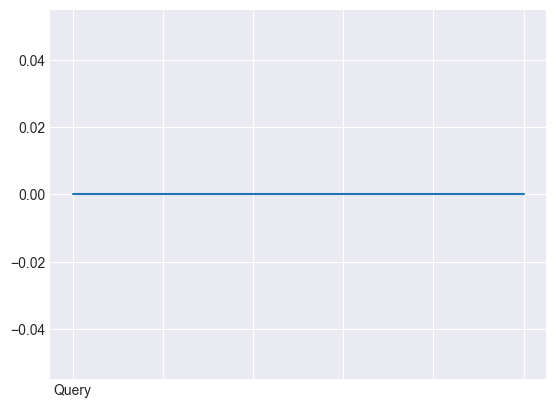

In [65]:
ax = train_df.isna().sum().plot()

In [66]:
ax.figure.savefig("jsadhf")

In [67]:
eda_train = eda(train_df)

In [70]:
perclass = eda_train.query_per_class()

<Axes: ylabel='Intent'>

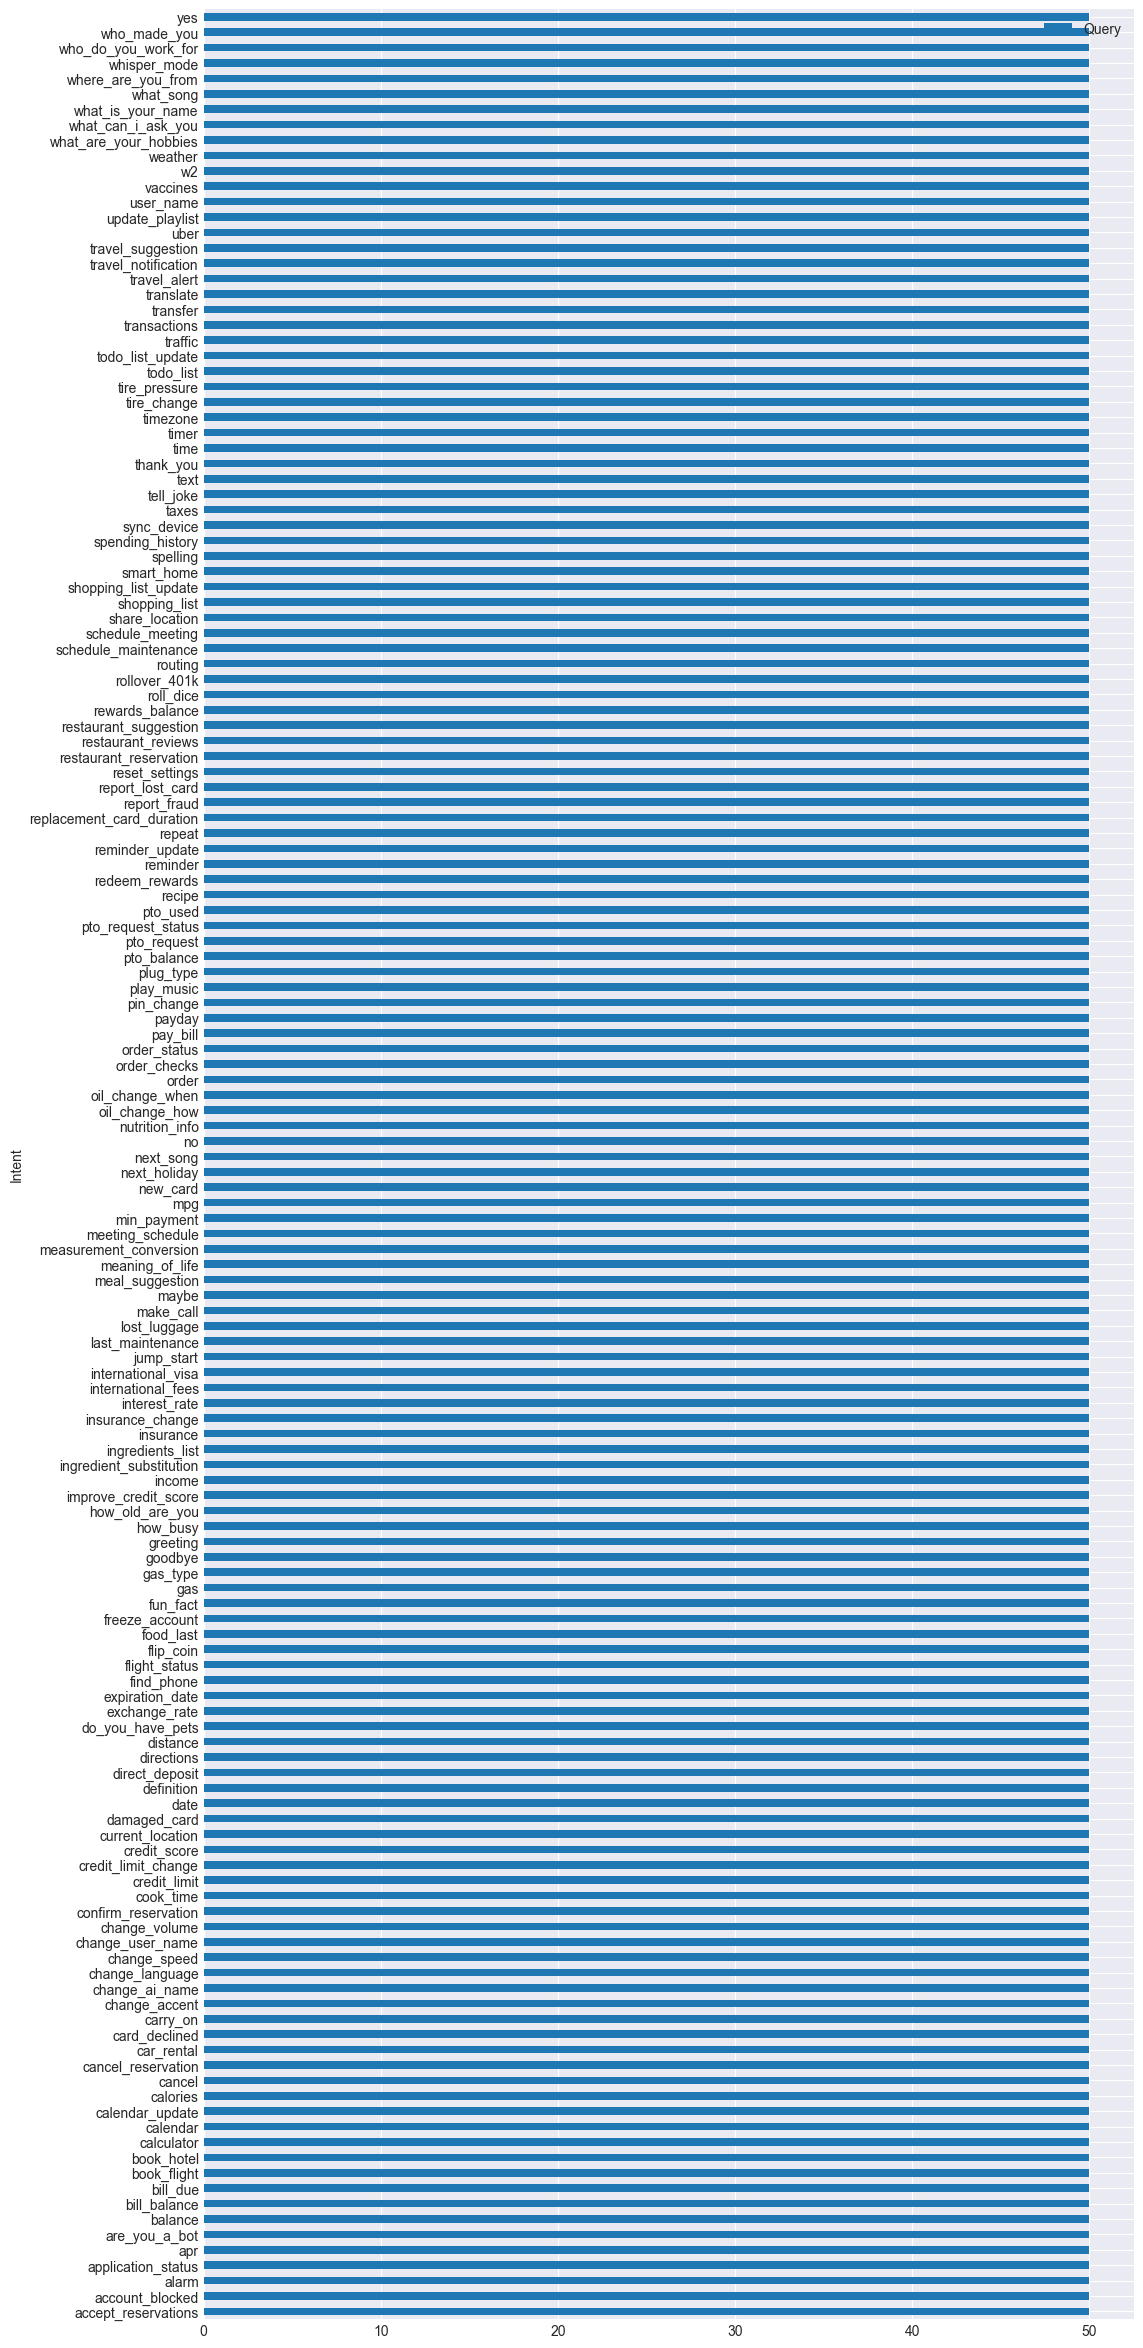

In [80]:
perclass.plot(kind="barh", figsize=(12, 30))

In [271]:
data = train_df.groupby(by="Intent").agg({"Query" : " ".join})

In [272]:
data

,Query
Intent,
accept_reservations,do they take reservations at arby's can you ma...
account_blocked,"was a hold placed on my wells fargo account, a..."
alarm,"at 9 tomorrow, set off the alarm set my alarm ..."
application_status,did the application i put in for a mastercard ...
apr,tell me the apr on my mastercard what's the cu...
...,...
where_are_you_from,where do you hail from so where did you live w...
whisper_mode,volume to whisper voice i want whisper mode to...
who_do_you_work_for,who is your boss which organization you work f...


In [273]:
from nltk import FreqDist

In [274]:
data.loc["accept_reservations"].iloc[0]

"do they take reservations at arby's can you make reservations at hodak's do they take reservations at state bird do they take reservations at olive garden are reservations taken at redrobin how many culver's take reservations does black rock take reservations do they take reservations at the progress do they take reservations at bar tartine can you let me if zeus accepts reservations does marios in brooklyn take reservations can i make a reservation at michael's does mcdonalds take reservations does gramercy tavern in new york accept reservations does moes in la except rerservations can i make reservations at applebee's or no do you know if ruth chris does reservations does minnis take reservations do they take reservations at applebees what locations of applebee's take reservations can applebees take any reservations does tartine in san francisco take reservations can acero take reservation does bar tartine in san francisco take reservations does buffalo wild wings take reservations 

In [275]:
for i, index in enumerate(data.index):
    FreqDist(word_tokenize(data.iloc[i, 0]))

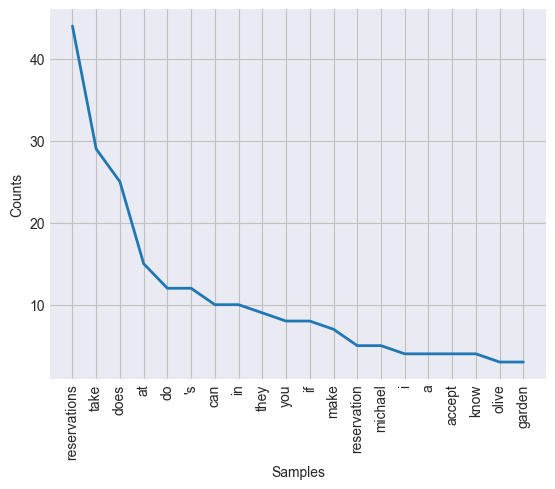

Axes(0.125,0.11;0.775x0.77)


In [276]:
for items in data.index:
    print(FreqDist(word_tokenize(data.loc[items].iloc[0])).plot(20))
    break
    

In [277]:
data.index[0]

'accept_reservations'

In [278]:
# for i in range(150):
#     FreqDist(data.iloc[i, 0].split()).plot(20, cumulative=False, percents=True, title=data.index[i])

In [279]:
FreqDist(data.iloc[0, 0].split()).tabulate()

 reservations          take          does            at            do           can            in          they           you            if          make   reservation     michael's             i             a        accept          know         olive        garden       tartine            me      redrobin           the           bar    applebee's     applebees           san     francisco       buffalo          wild         wings           bjs           for         takes          tell        arby's       hodak's         state          bird           are         taken           how          many      culver's         black          rock      progress           let          zeus       accepts        marios      brooklyn     mcdonalds      gramercy        tavern           new          york          moes            la        except rerservations            or            no          ruth         chris        minnis          what     locations            of           any         acero       

In [280]:
word_freq = FreqDist(data.iloc[0, 0].split())

<Axes: xlabel='Words'>

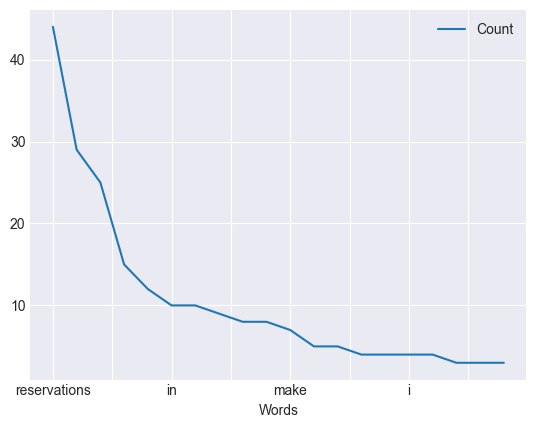

In [281]:
pd.DataFrame.from_dict(dict(word_freq), orient="index").rename_axis("Words").rename(columns={0:"Count"}).sort_values(by="Count", ascending=False).iloc[:20].plot(kind="line")

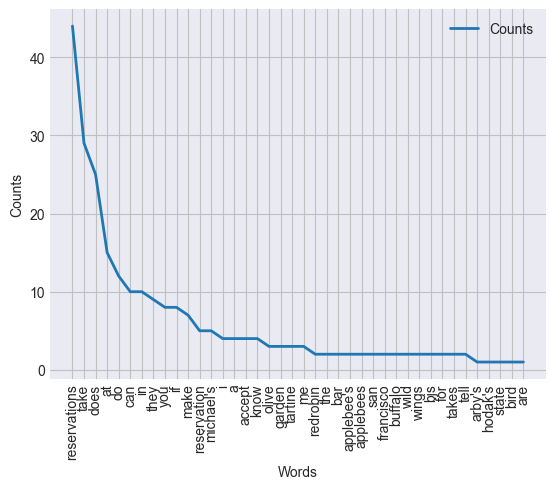

In [282]:
ax = word_freq.plot(40, show=False)
ax.set_xlabel("Words")
ax.legend(["Counts"])
plt.show()

In [283]:
import os

In [284]:
# if not os.path.exists(os.path.join(r"D:\MScDataScience\7.Data_Science_Project\SourceCode", "test")):
#     os.mkdir(os.path.join(r"D:\MScDataScience\7.Data_Science_Project\SourceCode", "test"))

In [285]:
from wordcloud import WordCloud

In [286]:
STOPSWORD_ENG

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

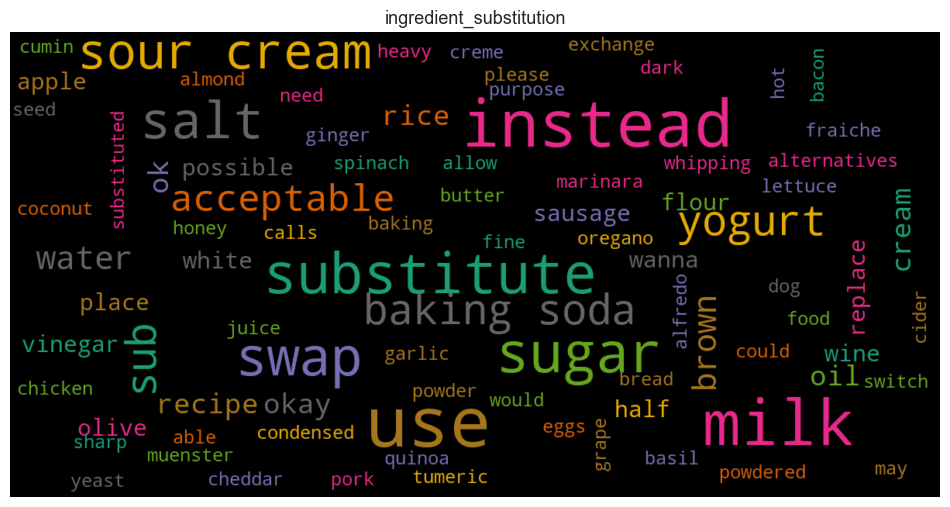

In [287]:
wordcloud = WordCloud(
        max_words=100,
        max_font_size=30,
        scale=3,
        stopwords=STOPSWORD_ENG,
        random_state=1, 
        colormap="Dark2").generate_from_text(data.iloc[55, 0])
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(data.index[55], fontsize=13)
plt.show()

In [288]:
wordcloud.words_

{'use': 1.0,
 'instead': 0.8333333333333334,
 'milk': 0.7777777777777778,
 'substitute': 0.6111111111111112,
 'sugar': 0.6111111111111112,
 'swap': 0.5555555555555556,
 'salt': 0.5,
 'sour cream': 0.4444444444444444,
 'yogurt': 0.3333333333333333,
 'sub': 0.3333333333333333,
 'baking soda': 0.3333333333333333,
 'acceptable': 0.2777777777777778,
 'water': 0.2222222222222222,
 'brown': 0.2222222222222222,
 'rice': 0.16666666666666666,
 'cream': 0.16666666666666666,
 'okay': 0.16666666666666666,
 'oil': 0.16666666666666666,
 'ok': 0.16666666666666666,
 'recipe': 0.16666666666666666,
 'place': 0.1111111111111111,
 'olive': 0.1111111111111111,
 'white': 0.1111111111111111,
 'wine': 0.1111111111111111,
 'apple': 0.1111111111111111,
 'sausage': 0.1111111111111111,
 'vinegar': 0.1111111111111111,
 'half': 0.1111111111111111,
 'possible': 0.1111111111111111,
 'wanna': 0.1111111111111111,
 'flour': 0.1111111111111111,
 'replace': 0.1111111111111111,
 'switch': 0.05555555555555555,
 'baking': 0.0

In [289]:
data = pd.DataFrame.from_dict({"Training": len(train_df), 
                         "Validation": len(val_df), 
                         "Testing": len(test_df)}, orient="index").rename(columns={0: "Counts"})

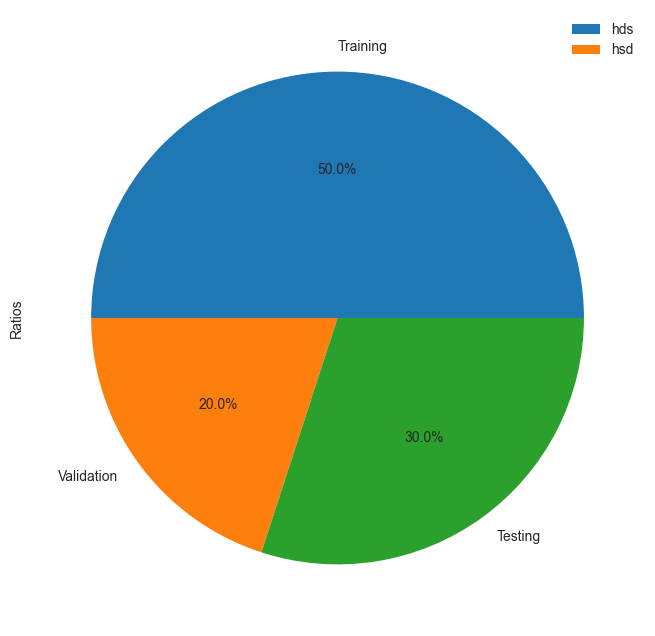

In [290]:
ax = data.plot(kind="pie", y="Counts", figsize=(8, 8), title="", autopct="%1.1f%%", ylabel="Ratios")
ax.legend(["hds", "hsd"])


In [ ]:
data.iloc[:, 0].values

7500

In [39]:
train_df.to_csv(r"D:\MScDataScience\7.Data_Science_Project\train.csv")

In [252]:
x = None

In [34]:
re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", "to-do")

'todo'

In [35]:
import preprocess_eda as pre_process

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
